## Spotify Data: Popular Hip-hop Artists/Tracks (Analysis)

### Description of the Dataset:
The dataset titled **"Spotify Data: Popular Hip-hop Artists and Tracks"** provides a curated collection of approximately 500 entries showcasing the vibrant realm of hip-hop music. These entries meticulously compile the most celebrated hip-hop tracks and artists, reflecting their significant influence on the genre's landscape. Each entry not only highlights the popularity and musical composition of the tracks but also underscores the creative prowess of the artists and their profound impact on global listeners.

### Application in Data Science:
- **product_id**: Unique identifier for each product  
- **product_name**: Name of the product  
- **category**: Category of the product  
- **discounted_price**: Discounted price of the product  
- **actual_price**: Actual price of the product  
- **discount_percentage**: Percentage of discount for the product  
- **rating**: Rating of the product (1-5)  
- **rating_count**: Number of people who voted for the Amazon rating  
- **about_product**: Description about the product  
- **user_id**: ID of the user who wrote the review  
- **user_name**: Name of the user who wrote the review  
- **review_id**: ID of the user review  
- **review_title**: Short review  
- **review_content**: Long review  
- **img_link**: Image link of the product  
- **product_link**: Official website link of the product  

This dataset is useful for analyzing product trends, customer reviews, and pricing strategies on Amazon.


In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Q1.Load the dataframe and ensure data quality by checking for missing values and duplicate rows.
 Handle missing values and remove duplicate rows if necessary.

In [143]:
import os
print(os.listdir())  # Lists all files in the current directory


['.ipynb_checkpoints', 'amazon.csv', 'Amazon_sales_data.ipynb', 'Amazon_Sales_Visualization', 'ams_analysis.csv', 'Average Rating per Product Category.png', 'EDA dataset 2 Hip Hop music.pdf', 'Spotify Data Analysis.ipynb', 'Spotify Data Visualization', 'spotify.csv', 'Spotify_Visualizations_Summary.ipynb']


In [144]:
df_spot = pd.read_csv("spotify.csv", encoding="latin1")
df_spot.head(2)


,Artist,Track Name,Popularity,Duration (ms),Track ID,Duration in m:sec
0,Drake,Rich Baby Daddy (Feat. Sexyy Red & Sza),92,319191,1yeB8MUNeLo9Ek1UEpsyz6,5:19
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0,3:54


In [145]:
df_spot.shape

(413, 6)

In [146]:
df_spot.isna().sum()     # to find in dataframe where all are na values

Artist               10
Track Name            0
Popularity            0
Duration (ms)         0
Track ID              0
Duration in m:sec     0
dtype: int64

In [123]:
df_spot[df_spot.isna().any(axis=1)]    # to find the rows of na values 

,Artist,Track Name,Popularity,Duration (ms),Track ID,Duration in m:sec
247,NaN,Carnival,96,264324,3w0w2T288dec0mgeZZqoNN,4:24
248,NaN,Burn,89,111458,04CyMEHliadfQWMUJb1w99,2:51
249,NaN,Fuk Sumn,88,209577,5tEaVciE2GnR28aN6W9cLS,3:30
250,NaN,Back To Me,86,295471,1icgLGTpX2fQXKRe4D7w2b,5:55
251,NaN,Stars,84,115238,347AQK5Lyhn6RvB8tBGYxt,2:55
252,NaN,Do It,83,225000,2iGvsJuc2mC4mDVOVMNAP6,4:45
253,NaN,Talking,81,185110,1eaqMiiUn2P7MnqJK4XeK0,3:05
254,NaN,Paid,82,195117,2y4ZR0BUAVePljHSsZyIgj,3:15
255,NaN,Paperwork,82,145785,2yyO7EKRr7c3txi4xCXUFk,2:26
256,NaN,Vultures,80,276986,3SIRBp4RRQ2AO5H4NO7xfq,5:37


In [124]:
df_spot = df_spot.dropna()    # deleted the na values 

In [125]:
df_spot.shape

(403, 6)

In [126]:
df_spot.isna().sum()

Artist               0
Track Name           0
Popularity           0
Duration (ms)        0
Track ID             0
Duration in m:sec    0
dtype: int64

In [127]:
df_spot = df_spot.dropna()    # deleted the na values 

In [128]:
df_spot.describe()

,Popularity,Duration (ms)
count,403.000000,403.000000
mean,75.143921,206456.558313
std,9.761032,53771.299971
min,29.000000,81666.000000
25%,69.000000,172362.500000
50%,76.000000,201480.000000
75%,82.000000,234826.500000
max,97.000000,501648.000000


In [129]:
# Ensure column is string and remove extra spaces
df_spot["Duration in m:sec"] = df_spot["Duration in m:sec"].astype(str).str.strip()

# Function to safely convert "m:ss" to total seconds
def convert_to_seconds(time_str):
    try:
        parts = time_str.split(":")
        if len(parts) == 2:  # Expected format "m:ss"
            return float(parts[0]) * 60 + float(parts[1])
        else:
            return None  # Handle unexpected format
    except:
        return None  # Handle conversion errors

# Apply function to the column
df_spot["Duration (seconds)"] = df_spot["Duration in m:sec"].apply(convert_to_seconds)


In [130]:
print(df_spot["Duration (seconds)"].dtype)  # Should be float64


float64


In [131]:
df_spot.dtypes

Artist                 object
Track Name             object
Popularity              int64
Duration (ms)           int64
Track ID               object
Duration in m:sec      object
Duration (seconds)    float64
dtype: object

In [132]:
df_spot.describe()

,Popularity,Duration (ms),Duration (seconds)
count,403.000000,403.000000,402.000000
mean,75.143921,206456.558313,237.711443
std,9.761032,53771.299971,64.311945
min,29.000000,81666.000000,82.000000
25%,69.000000,172362.500000,193.000000
50%,76.000000,201480.000000,233.000000
75%,82.000000,234826.500000,281.750000
max,97.000000,501648.000000,502.000000


In [133]:
df_spot.nlargest(5,'Duration (ms)')      # top 5 largest song in duration 

,Artist,Track Name,Popularity,Duration (ms),Track ID,Duration in m:sec,Duration (seconds)
396,Dj Khaled,"God Did (Feat. Rick Ross, Lil Wayne, Jay-Z, Jo...",64,501648,2sOj9vyd6yiss9W1IK6chU,8:22,502.0
83,Eminem,Stan,84,404106,3UmaczJpikHgJFyBTAJVoz,7:44,464.0
86,Kendrick Lamar,Money Trees,82,386906,2HbKqm4o0w5wEeEFXm2sD4,6:27,387.0
166,Travis Scott,Skitzo (Feat. Young Thug),78,366592,0bkV1iQHSxBaksUqgEkcbc,6:07,367.0
60,Drake,Forever,77,357706,5UsLjwBaTHBX4ektWIr4XX,6:58,418.0


Q2.What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

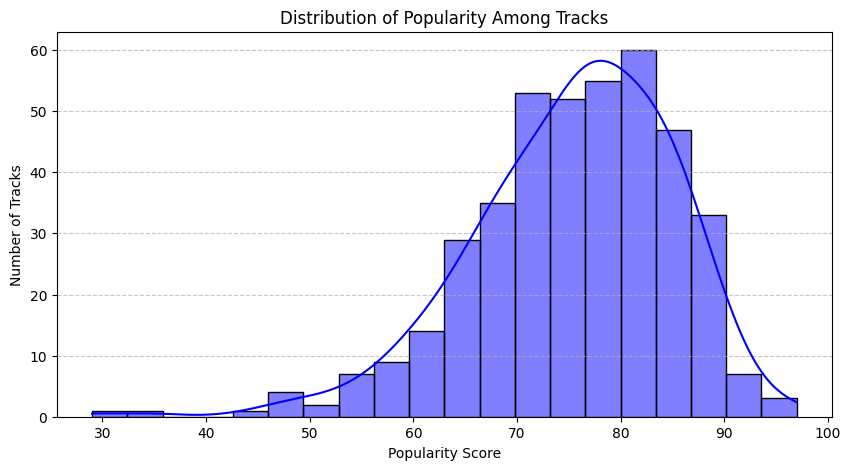

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_spot = pd.read_csv("spotify.csv", encoding="latin1")

# Plot the histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_spot["Popularity"], bins=20, kde=True, color="blue")

# Labels and title
plt.xlabel("Popularity Score")
plt.ylabel("Number of Tracks")
plt.title("Distribution of Popularity Among Tracks")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("Spotify Data Visualization/Distribution of Popularity Among Tracks.png", dpi=100, bbox_inches='tight')

# Show the plot
plt.show()


# Insights from the Histogram

## **Left-Skewed Distribution**
- The distribution is left-skewed ** .
- Few tracks have extremely low popularity (below 40), indicating that most included songs are relatively well-known.

## **Peak Popularity Range**
- The **majority of tracks have a popularity score between 70 and 85**, with the **highest frequency around 80**.
- This suggests that most of the hip-hop tracks in this dataset are fairly popular.

## **Low Popularity Songs Exist but Are Rare**
- A **small number of tracks have popularity below 50**, indicating that lesser-known songs are not the dataset's focus.
- This might be due to data selection favoring **top-charting tracks**.

## **KDE Curve Shape**
- The KDE curve reinforces this, showing a peak in the higher popularity range, tapering off towards the lower end.
- This means **popularity isn't evenly distributed**—tracks tend to be more popular overall.


Q3.Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

In [135]:
# Ensure 'Duration in m:sec' exists and is a string
df_spot["Duration in m:sec"] = df_spot["Duration in m:sec"].astype(str)

# Convert 'm:ss' format to total seconds
df_spot["Duration (seconds)"] = df_spot["Duration in m:sec"].apply(lambda x: 
    float(x.split(":")[0]) * 60 + float(x.split(":")[1]) if ":" in x else None
)

print(df_spot.head())  # Check if 'Duration (seconds)' appears


  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (Feat. Sexyy Red & Sza)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       Idgaf (Feat. Yeat)          90         260111   
3  Drake     First Person Shooter (Feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (Feat. 21 Savage)          88         218364   

                 Track ID Duration in m:sec  Duration (seconds)  
0  1yeB8MUNeLo9Ek1UEpsyz6              5:19               319.0  
1  1zi7xx7UVEFkmKfv06H8x0              3:54               234.0  
2  2YSzYUF3jWqb9YP9VXmpjE              4:20               260.0  
3  7aqfrAY2p9BUSiupwk3svU              4:07               247.0  
4  3F5CgOj3wFlRv51JsHbxhe              4:38               278.0  


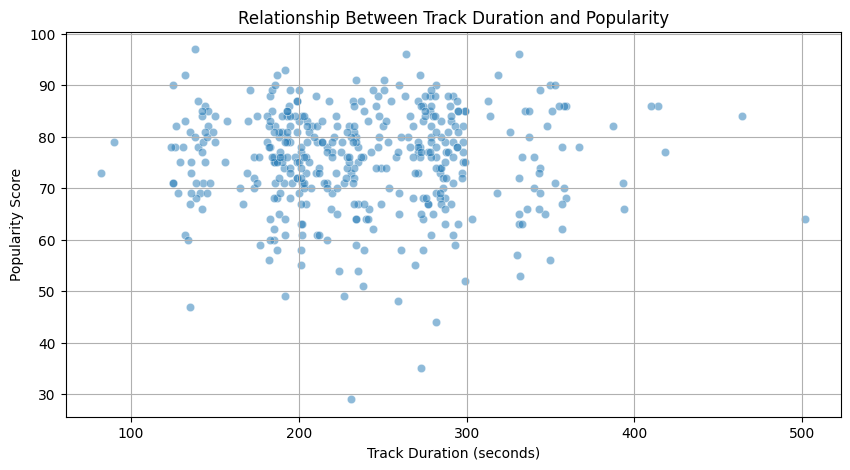

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Duration vs. Popularity
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_spot["Duration (seconds)"], y=df_spot["Popularity"], alpha=0.5)

# Add title and labels
plt.title("Relationship Between Track Duration and Popularity")
plt.xlabel("Track Duration (seconds)")
plt.ylabel("Popularity Score")
plt.grid(True)
plt.savefig("Relationship Between Track Duration and Popularity.png", dpi=100, bbox_inches='tight')





## 🎵 Insights on Track Duration vs. Popularity

### 1️⃣ No Clear Trend  
- The points are **widely scattered**, meaning **track duration does not strongly impact popularity**.  
- If there were a relationship, we would expect a visible pattern (like an **upward or downward trend**), but here, **popularity remains high for both short and long tracks**.  

### 2️⃣ Most Popular Tracks Cluster Between 150-250 Seconds  
- The majority of popular tracks (**70+ popularity score**) are within **150-250 seconds (2.5 to 4 minutes)**.  
- This suggests that **most hit songs follow a standard duration**—neither too short nor too long.  


4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist
using a countplot.

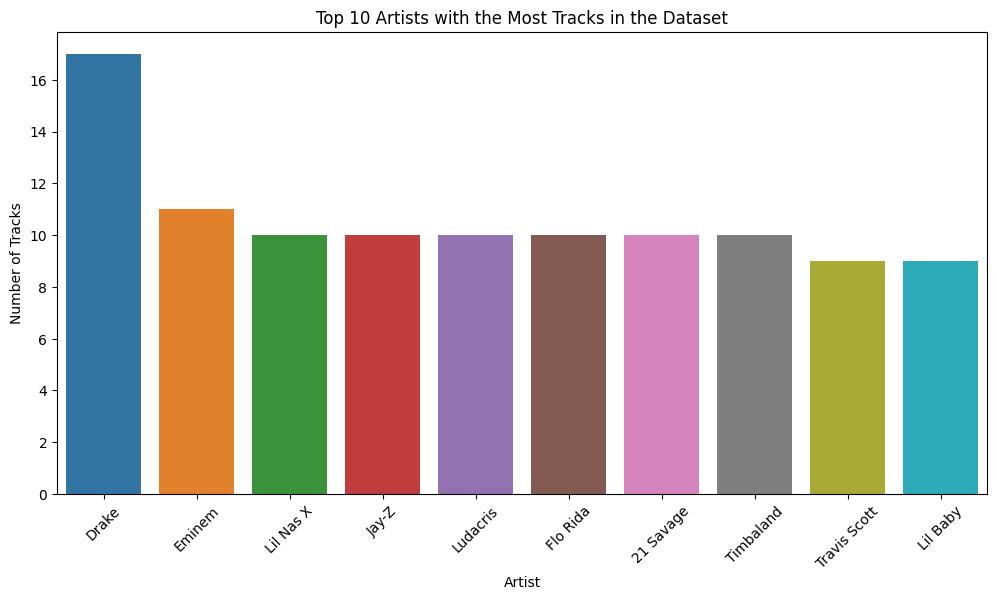

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# the number of tracks for each artist
artist_counts = df_spot["Artist"].value_counts().head(10)  # Top 10 artists

# the count of tracks per artist
plt.figure(figsize=(12, 6))
sns.barplot(x=artist_counts.index, y=artist_counts.values, hue=artist_counts.index, dodge=False, legend=False)

# Labels and title
plt.xlabel("Artist")
plt.ylabel("Number of Tracks")
plt.title("Top 10 Artists with the Most Tracks in the Dataset")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.savefig("Top 10 Artists with the Most Tracks in the Dataset.png", dpi=100, bbox_inches='tight')
plt.show()


Q5.What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [92]:
# the 5 least popular tracks
least_popular_tracks = df_spot[['Track Name', 'Artist', 'Popularity']].nsmallest(5, 'Popularity')

print(least_popular_tracks)


                        Track Name          Artist  Popularity
199  Attachments (Feat. Coi Leray)          Pressa          29
219                     Intentions   Justin Bieber          35
390                Splash Brothers  French Montana          44
213                  On Me - Remix        Lil Baby          47
384      911 (Feat. Mary J. Blige)     Wyclef Jean          48


Q6.Among the top 5 most popular artists, which artist has the highest popularity on average?
 Calculate and display the average popularity for each artist.

In [95]:
# Group by Artist and calculate the mean popularity
artist_avg_popularity = df_spot.groupby('Artist')['Popularity'].mean()

# Get the top 5 most popular artists based on average popularity
top_5_artists = artist_avg_popularity.nlargest(5)

# Find the artist with the highest average popularity
most_popular_artist = top_5_artists.idxmax()  # Artist with highest avg popularity
highest_avg_popularity = top_5_artists.max()  # Highest avg popularity score

# Display results
print("Top 5 Artists with Highest Average Popularity:")
print(top_5_artists)

print(f"\nArtist with the Highest Average Popularity: {most_popular_artist}")
print(f"Highest Average Popularity Score: {highest_avg_popularity:.2f}")


Top 5 Artists with Highest Average Popularity:
Artist
Cassã¶          92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
Anuel Aa        85.000000
Name: Popularity, dtype: float64

Artist with the Highest Average Popularity: Cassã¶
Highest Average Popularity Score: 92.00


Q7.For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [101]:
!pip install unidecode


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [102]:
from unidecode import unidecode

# Step 1: Group by Artist and calculate average popularity
artist_avg_popularity = df_spot.groupby('Artist')['Popularity'].mean().sort_values(ascending=False)

# Step 2: Select the Top 5 Artists based on highest average popularity
top_5_artists = artist_avg_popularity.head(5).index  # Get artist names

# Step 3: Find the most popular track for each of these top 5 artists
most_popular_tracks = df_spot.loc[df_spot.groupby('Artist')['Popularity'].idxmax(), ['Artist', 'Track Name', 'Popularity']]

# Step 4: Filter to keep only the tracks from the top 5 artists
most_popular_tracks = most_popular_tracks[most_popular_tracks['Artist'].isin(top_5_artists)]

# Step 5: Fix Encoding Issues by Translating Special Characters
most_popular_tracks['Artist'] = most_popular_tracks['Artist'].apply(lambda x: unidecode(str(x)))

# Step 6: Display Results
print("Most Popular Tracks of the Top 5 Artists:")
print(most_popular_tracks)


Most Popular Tracks of the Top 5 Artists:
           Artist                    Track Name  Popularity
184      Anuel Aa                            Oa          85
134        CassaP                         Prada          92
192  David Guetta            Baby Don'T Hurt Me          87
30   Travis Scott    Fe!N (Feat. Playboi Carti)          93
229        Trueno  Mamichula - Con Nicki Nicole          89


Q8.Visualize relationships between multiple numerical variables simultaneously using a pair plot

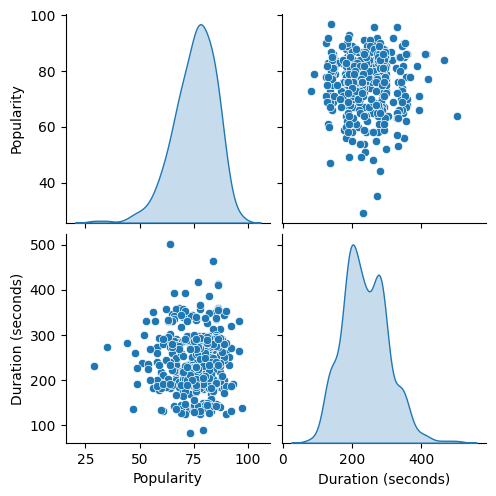

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting relevant numerical columns
num_columns = ['Popularity', 'Duration (seconds)']

# Creating the pair plot
sns.pairplot(df_spot[num_columns], diag_kind="kde")  # kde for smooth density plots
plt.savefig("Relationships between multiple numerical variables .png", dpi=100, bbox_inches='tight')
# Show the plot
plt.show()


# 🔍 Insights from the Pair Plot

## 1️⃣ No Strong Relationship Between Duration and Popularity  
- The scatter plot (bottom-left) shows a wide distribution of points with no clear trend.  
- This suggests track duration does not significantly affect popularity.  

## 2️⃣ Most Tracks Are Between 150-300 Seconds  
- The **Duration (seconds) KDE plot (bottom-right)** shows a peak between **150-300 seconds**.  
- This aligns with typical song lengths (**2.5 - 5 minutes**).  

## 3️⃣ Popularity is Skewed Toward Higher Values  
- The **Popularity KDE plot (top-left)** shows that most tracks have a **popularity score above 70**.  
- This suggests the dataset contains mostly well-known and trending songs.  

## 4️⃣ Dense Cluster of Popular Tracks Between 70-90 Popularity  
- The **scatter plot (top-right)** shows a **dense cluster around 70-90 popularity scores**.  
- Most songs in the dataset fall within this range.  

## 💡 Conclusion:  
There is **no strong relationship** between song duration and popularity, but most hit songs are between **150-300 seconds long** and have a **popularity score of 70+**. 🚀  


Q9.Does the duration of tracks vary significantly across different artists?
 Explore this visually using a box plot or violin plot.

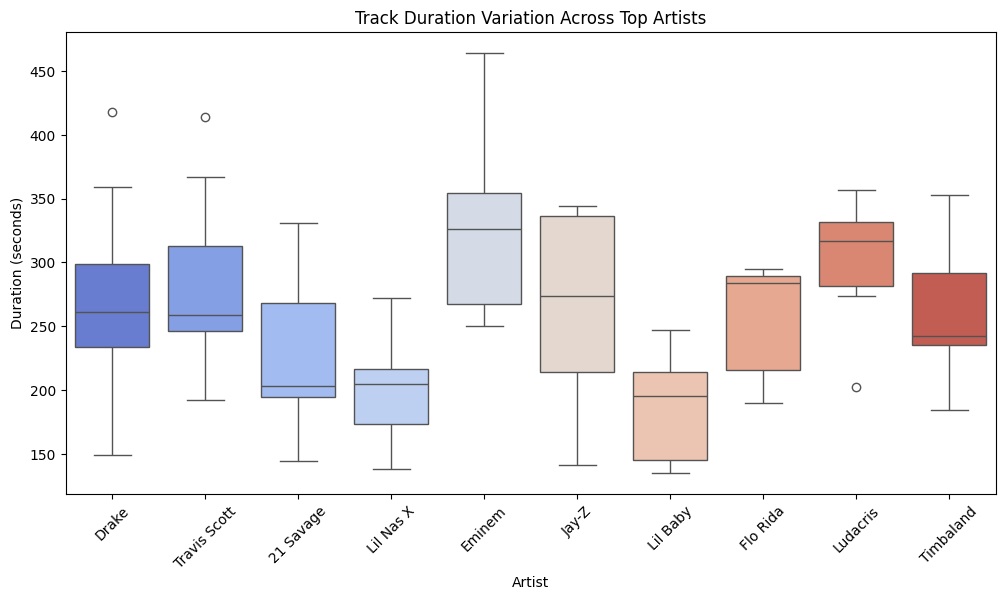

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select top artists with the most tracks for better readability
top_artists = df_spot['Artist'].value_counts().head(10).index  
filtered_df = df_spot[df_spot['Artist'].isin(top_artists)]

# Plot the box plot with hue assigned
plt.figure(figsize=(12, 6))
sns.boxplot(x="Artist", y="Duration (seconds)", data=filtered_df, hue="Artist", legend=False, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Track Duration Variation Across Top Artists")
plt.ylabel("Duration (seconds)")
plt.xlabel("Artist")
plt.savefig("Track Duration Variation Across Top Artists .png", dpi=100, bbox_inches='tight')
plt.show()


# 📊 Insights from the Box Plot

## 1️⃣ Track Duration Varies Across Artists  
- Different artists have different ranges of song durations.  
- Some artists tend to have longer songs (e.g., **Eminem, Jay-Z**), while others have shorter ones (e.g., **Lil Nas X, Lil Baby**).  

## 2️⃣ Presence of Outliers (Small Circles)  
- The small circles outside the box plot represent **outliers**—tracks that have durations significantly different from the majority of that artist’s songs.  
- For example:  
  - **Eminem and Jay-Z** have **longer-than-usual songs** as outliers.  
  - **Lil Baby and Ludacris** have a few **shorter-than-usual tracks**.  
- These outliers suggest that some artists experiment with very long or short tracks compared to their usual range.  

## 3️⃣ IQR (Interquartile Range) and Median Durations  
- The **box represents the IQR (middle 50% of data)**, meaning most songs fall in this range.  
- The **horizontal line inside the box is the median** (midpoint duration).  
- **Eminem & Jay-Z** have a **higher median duration**, meaning they generally create longer tracks.  
- **Lil Baby & Lil Nas X** have lower medians, indicating shorter songs.  

## 4️⃣ Artists with High Variability in Track Duration  
- **Eminem & Jay-Z** show the widest duration range, meaning they produce both **short and long songs**.  
- **Lil Nas X & Lil Baby** have more **consistent** song durations, with a tighter range.  

## 💡 Conclusion  
- **Some artists consistently produce songs within a specific duration range**, while others experiment with both short and long songs.  
- **Outliers suggest occasional deviations**, possibly special versions, remixes, or unique tracks that break the usual pattern.  


Q10.How does the distribution of track popularity vary for different artists?
Visualize this using a swarm plot or a violin plot.

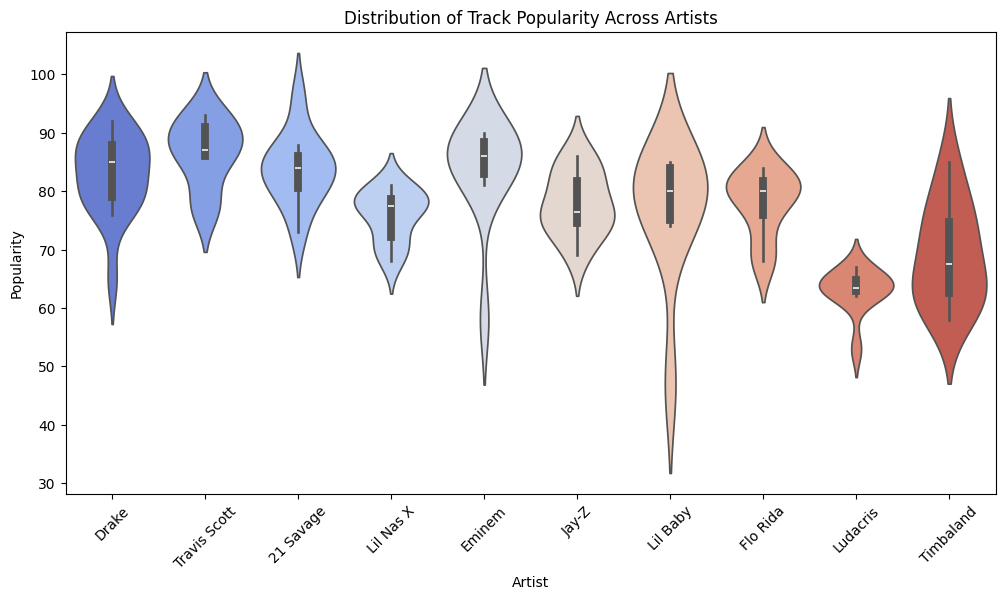

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="Artist", y="Popularity", data=filtered_df, hue="Artist", palette="coolwarm", legend=False)

# Customize the plot
plt.xticks(rotation=45)
plt.title("Distribution of Track Popularity Across Artists")
plt.xlabel("Artist")
plt.ylabel("Popularity")
plt.savefig("Distribution of Track Popularity Across Artists .png", dpi=100, bbox_inches='tight')
plt.show()


## Insights from the Violin Plot

### 1️⃣ Track Popularity Distribution Varies Across Artists
- Some artists have a **tight and high distribution** (e.g., **Travis Scott, Eminem**) indicating their songs are mostly popular.
- Others have a **wider spread** (e.g., **Timbaland, Lil Baby**), meaning their songs range from **less popular to highly popular**.

### 2️⃣ Central White Line (Median Popularity)
- The **white horizontal line** inside each violin represents the **median popularity** (middle value of all track popularity scores for that artist).
- **Travis Scott and Eminem** have **high medians**, meaning most of their tracks are well-received.
- **Timbaland and Ludacris** have **lower medians**, indicating their songs have more variation in popularity.

### 3️⃣ Density of Songs (Thickness of the Violin)
- A **wider section** of the violin plot means **more songs** fall in that popularity range.
- A **narrow section** indicates fewer songs at that popularity level.
- **Lil Baby’s plot has a long, thin tail at the bottom**, suggesting some of his songs have **very low popularity compared to his others**.

### 4️⃣ Outliers and Lower Tails (Less Popular Songs)
- Some violins **extend downward**, meaning a few tracks from those artists have **very low popularity**.
- **Lil Baby and Timbaland** show **long lower tails**, suggesting they have **some songs that are much less popular than their average track**.

### 💡 Conclusion:
- **Artists like Eminem & Travis Scott have consistently high popularity** across most tracks.
- **Lil Baby & Timbaland show large variation**, with some **hits** but also **less popular songs**.
- **The downward extensions in the plot suggest some artists have underperforming tracks** in addition to their more popular ones.


In [113]:
import os
from nbformat import v4

# Set the correct folder path
folder_path = "Spotify Data Visualization"

# Ensure the folder exists
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

# Create a new Jupyter notebook
nb = v4.new_notebook()

# Load all saved images and add markdown + image cells
cells = []

# Check if the folder contains any images
image_files = sorted([f for f in os.listdir(folder_path) if f.endswith(".png")])

if not image_files:
    print(f"❌ No images found in the '{folder_path}' folder. Make sure to save plots first.")
else:
    for filename in image_files:
        image_path = f"{folder_path}/{filename}"
        
        # ✅ Corrected string formatting issue
        markdown_text = f"### Visualization: {filename.replace('.png', '').replace('_', ' ').title()}"
        img_markdown = f"![{filename}]({image_path})"
        
        # Add markdown cell with title
        cells.append(v4.new_markdown_cell(markdown_text))
        # Add markdown cell with image
        cells.append(v4.new_markdown_cell(img_markdown))

    # Add cells to the notebook
    nb.cells.extend(cells)

    # Save notebook
    output_notebook = "Spotify_Visualizations_Summary.ipynb"
    with open(output_notebook, "w", encoding="utf-8") as f:
        f.write(v4.writes(nb))

    print(f"✅ All visualizations saved in '{output_notebook}' successfully!")


❌ No images found in the 'Spotify Data Visualization' folder. Make sure to save plots first.
